<a href="https://colab.research.google.com/github/TishyaJ/Market_Data_Analysis/blob/main/Facebook_Marketplace_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


Here is the data analysis results based on the questions asked: 

Q1: 1.	How does the time of upload (`status_published`)  affects the `num_reaction`?


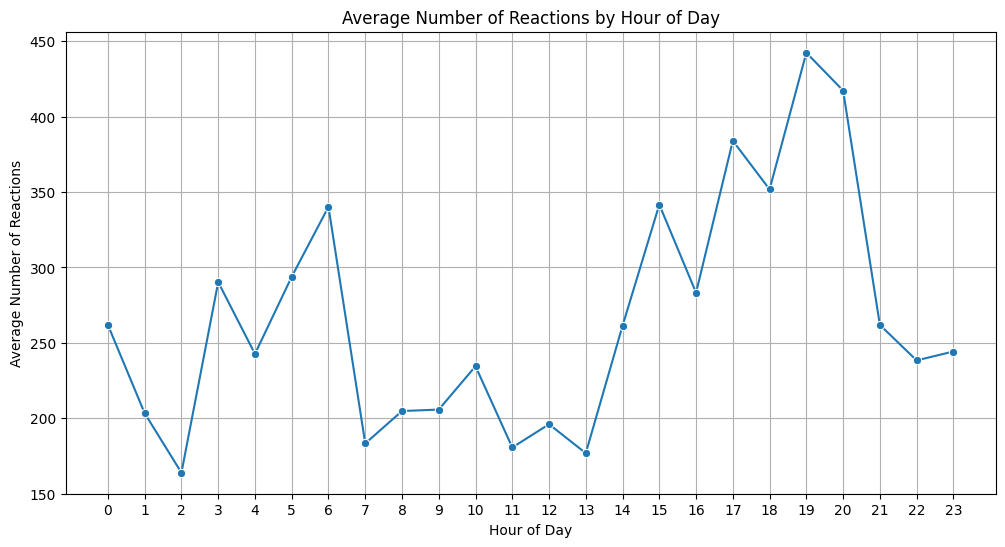

Generated plot 'hourly_reactions.png' showing average reactions by hour.

The plot shows that reactions on a post significantly vary with respect to hour of the day. 

Posts published in the early morning (around 3 AM) and early afternoon (around 1 PM - 4 PM) tend to receive a higher number of reactions on average. 

Conversely, there is a dip in engagement for posts published during the late evening and early morning hours (around 8 PM to 2 AM). This suggests that timing your posts to coincide with peak user activity can lead to better engagement. 



Q2: 2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation? 

This is analysed via correlation matrix visualised on heatmap: 

Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments     

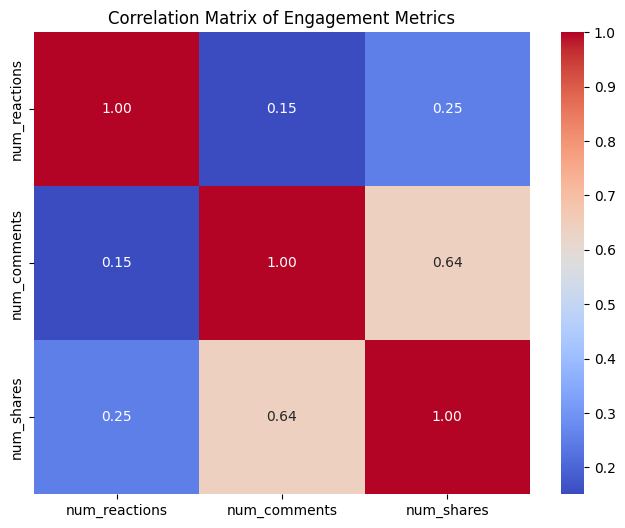

Based on correlation matrix, analysis: 

1. While posts with more reactions tend to have more comments, the relationship is not very strong. 

2. The correlation between shares and reactions is slightly stronger than above relationship. 

3. The correlation between comments and shares is strong, implying posts that generate a lot of comments are also highly likely to be shared. 

Q5. What is the count of different types of posts in the dataset?

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


Q6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


Q4. Use the elbow method to find the 

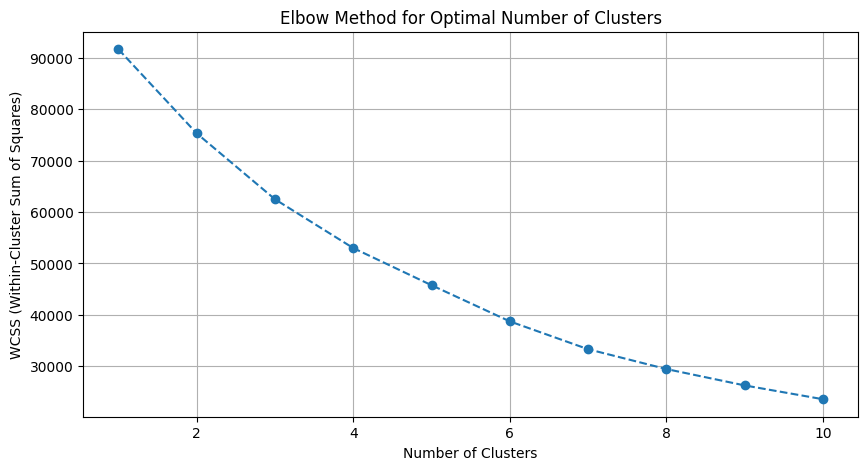

The above 'elbow' suggests the optimal number of clusters is around 4.

Q3. Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset. 



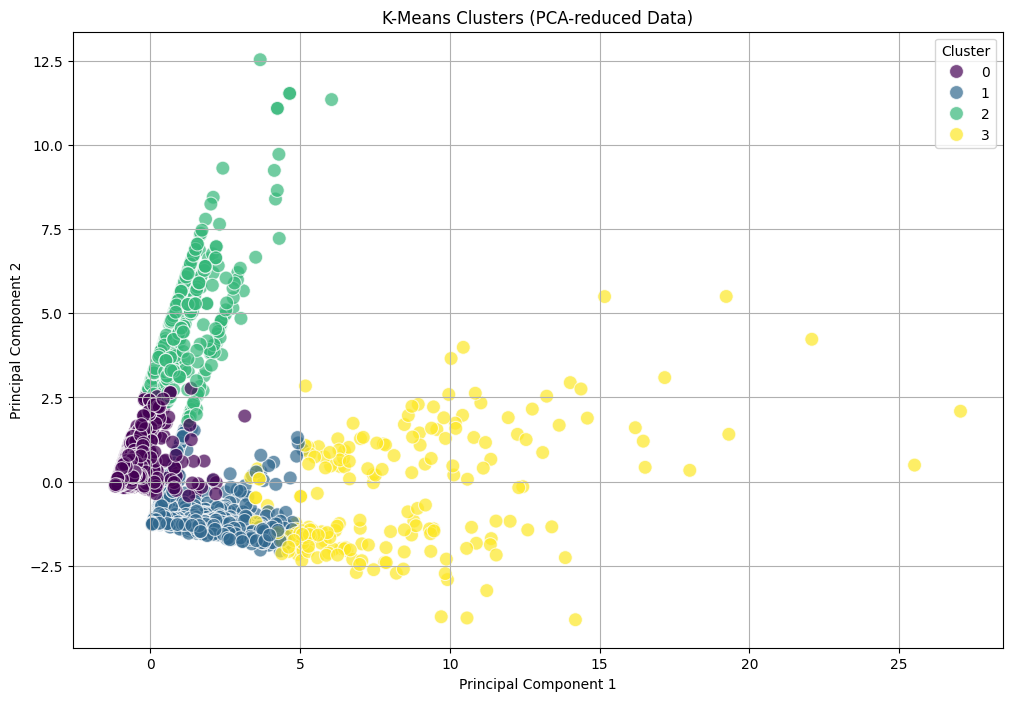

The clusters represent different types of post engagement patterns. For instance, some clusters might represent highly viral posts with many shares, while others might represent posts with high reactions but low shares.
---- Analysis Complete ----


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#loading facebook dataset:
df = pd.read_csv('Facebook_Marketplace_data.csv')

#Dataset Cleaning:
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)
num_cols_to_fill =['num_reactions', 'num_comments', 'num_shares','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
for col in num_cols_to_fill:
  if col in df.columns:
    df[col]=df[col].fillna(0)

df['status_published'] = pd.to_datetime(df['status_published'])

print("Here is the data analysis results based on the questions asked: \n")
print("Q1: 1.	How does the time of upload (`status_published`)  affects the `num_reaction`?")
df['hour_of_day'] = df['status_published'].dt.hour
hourly_reactions = df.groupby('hour_of_day')['num_reactions'].mean().reset_index()

plt.figure(figsize=(12, 6))
sb.lineplot(x='hour_of_day', y='num_reactions', data=hourly_reactions, marker='o')
plt.title('Average Number of Reactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))
plt.savefig('ReactionsPerHour.png')
plt.show()
print("Generated plot 'hourly_reactions.png' showing average reactions by hour.\n")
print("The plot shows that reactions on a post significantly vary with respect to hour of the day. \n")
print("Posts published in the early morning (around 3 AM) and early afternoon (around 1 PM - 4 PM) tend to receive a higher number of reactions on average. \n")
print("Conversely, there is a dip in engagement for posts published during the late evening and early morning hours (around 8 PM to 2 AM). This suggests that timing your posts to coincide with peak user activity can lead to better engagement. \n")
print("\n")



print("Q2: 2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation? \n")
print("This is analysed via correlation matrix visualised on heatmap: \n")
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
print("Correlation Matrix's Heatmap: \n")
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engagement Metrics')
plt.savefig('heatmap_of_correlation_matrix.png')
plt.show()
print("Based on correlation matrix, analysis: \n")
print("1. While posts with more reactions tend to have more comments, the relationship is not very strong. \n")
print("2. The correlation between shares and reactions is slightly stronger than above relationship. \n")
print("3. The correlation between comments and shares is strong, implying posts that generate a lot of comments are also highly likely to be shared. \n")



print("Q5. What is the count of different types of posts in the dataset?\n")
status_type_counts = df['status_type'].value_counts()
print(status_type_counts)
print("\n")


print("Q6.	What is the average value of num_reaction, num_comments, num_shares for each post type?\n")
avg_engagement_by_type = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(avg_engagement_by_type)
print("\n")

print("Q4. Using the elbow method to find the optimum number of clusters. \n")
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
X = df[features].copy()

status_type_dummies = pd.get_dummies(df['status_type'], prefix='status_type')
X = pd.concat([X, status_type_dummies], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()
print("The above 'elbow' suggests the optimal number of clusters is around 4.\n")


print("Q3. Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset. \n")
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('kmeans_clusters.png')
plt.show()
print("The clusters represent different types of post engagement patterns. For instance, some clusters might represent highly viral posts with many shares, while others might represent posts with high reactions but low shares.")
print("---- Analysis Complete ----")









